In [ ]:
!wget https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv
!wget https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv
!wget https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_df = pd.read_csv("wetter.csv")
kiwo_df = pd.read_csv("kiwo.csv")
sales_df = pd.read_csv("umsatzdaten_gekuerzt.csv")
holidays_df = pd.read_csv("holidays.csv")

print("Weather")
print(f" has {len(weather_df)} rows")
print(weather_df.head())
print("Kieler Woche")
print(f" has {len(kiwo_df)} rows")
print(kiwo_df.head())
print("Sales")
print(f" has {len(sales_df)} rows")
print(sales_df.head())
print("Holidays")
print(f" has {len(holidays_df)} rows")
print(holidays_df.head())


Weather
 has 2601 rows
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
Kieler Woche
 has 72 rows
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
Sales
 has 9334 rows
        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
Holidays
 has 577 rows
         date  summer  autumn  christmas  winter  easter  pentecoast
0  2013-06-24   

In [40]:
df = weather_df.merge(kiwo_df, on="Datum", how="left").merge(sales_df, on="Datum").merge(holidays_df, left_on="Datum", right_on="date", suffixes=("", "holiday_",))
df.fillna({"KielerWoche": 0, "holiday_sommer": 0, "holiday_autumn": 0, "holiday_christmas": 0, "holiday_winter": 0, "holiday_easter": 0, "holiday_pentecoast": 0}, inplace=True)
print(df.head())

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2013-07-01         6.0     17.8375                   15        20.0   
1  2013-07-01         6.0     17.8375                   15        20.0   
2  2013-07-01         6.0     17.8375                   15        20.0   
3  2013-07-01         6.0     17.8375                   15        20.0   
4  2013-07-01         6.0     17.8375                   15        20.0   

   KielerWoche  Warengruppe      Umsatz        date  summer  autumn  \
0          0.0            1  148.828353  2013-07-01       1       0   
1          0.0            2  535.856285  2013-07-01       1       0   
2          0.0            3  201.198426  2013-07-01       1       0   
3          0.0            4   65.890169  2013-07-01       1       0   
4          0.0            5  317.475875  2013-07-01       1       0   

   christmas  winter  easter  pentecoast  
0          0       0       0           0  
1          0       0       0           0  

In [41]:
# Features
#df["StartOfMonth"] = df[df["Datum_dt"].dt.day < 7]
df['Datum_dt'] = pd.to_datetime(df['Datum'])
df["StartOfMonth"] = np.where(df["Datum_dt"].dt.day < 7, 1, 0)

In [42]:
# Split (train and validation)

train_df = df[(df["Datum_dt"] >= "01.07.2013") & (df["Datum_dt"] <= "31.07.2017")]
validation_df = df[(df["Datum_dt"] >= "01.08.2017") & (df["Datum_dt"] <= "31.07.2018")]

print(f"Training Dataset length: {len(train_df)}")
print(f"Validation Dataset length: {len(validation_df)}")

Training Dataset length: 1694
Validation Dataset length: 605


In [43]:
import statsmodels.formula.api as smf

# Fit the linear model
mod = smf.ols('Umsatz ~ summer * autumn * StartOfMonth * C(Warengruppe)', data=df).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     188.1
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:41:23   Log-Likelihood:                -13018.
No. Observations:                2184   AIC:                         2.610e+04
Df Residuals:                    2151   BIC:                         2.629e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [9]:
import statsmodels.formula.api as smf

# Fit the linear model
mod = smf.ols('Umsatz ~ summer + autumn + StartOfMonth + C(Warengruppe)', data=df).fit()

# Print the summary
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     612.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:48:38   Log-Likelihood:                -13188.
No. Observations:                2184   AIC:                         2.639e+04
Df Residuals:                    2175   BIC:                         2.645e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             114.0847    

In [10]:
import statsmodels.formula.api as smf

# Fit the linear model
#mod = smf.ols('Umsatz ~ summer + autumn + StartOfMonth + C(Warengruppe)', data=df).fit()
mod = smf.ols('Umsatz ~ summer + autumn + StartOfMonth + C(Warengruppe) + summer:C(Warengruppe) + autumn:C(Warengruppe)', data=df).fit()

# Print the summary
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     350.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:49:09   Log-Likelihood:                -13032.
No. Observations:                2184   AIC:                         2.610e+04
Df Residuals:                    2166   BIC:                         2.620e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [13]:
df['log_Umsatz'] = np.log(df['Umsatz'])
mod = smf.ols('log_Umsatz ~ summer + autumn + StartOfMonth + C(Warengruppe) + summer:C(Warengruppe) + autumn:C(Warengruppe)', data=df).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:             log_Umsatz   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     638.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:55:17   Log-Likelihood:                -404.47
No. Observations:                2184   AIC:                             844.9
Df Residuals:                    2166   BIC:                             947.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Multikollinearität durch Berechnung der Variance Inflation Factors (VIF)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [17]:
def calculate_vif(X):
    X = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

       Variable       VIF
0         const  8.068587
2        autumn  1.269561
1        summer  1.244025
3  StartOfMonth  1.043404
4   Warengruppe  1.001867


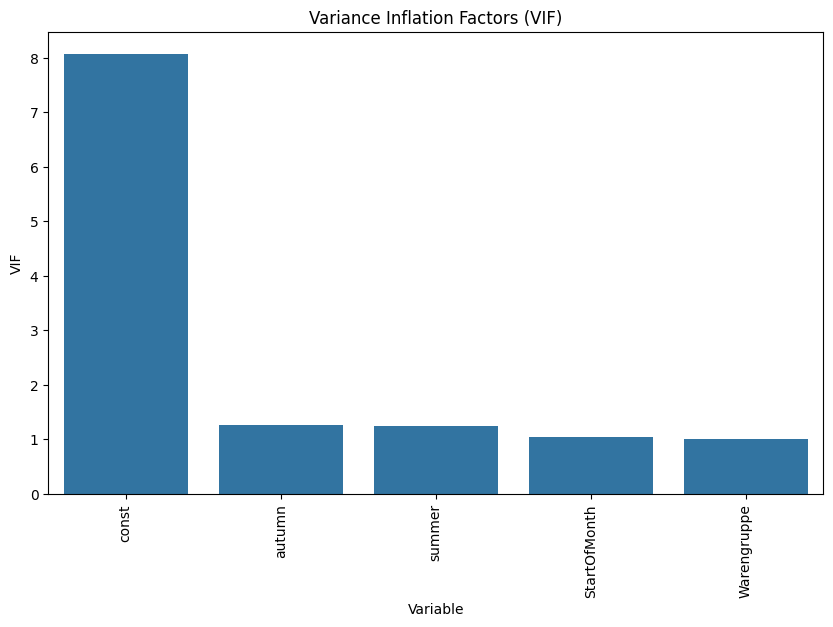

In [28]:
formula = 'log_Umsatz ~ summer + autumn + StartOfMonth + C(Warengruppe) + summer:C(Warengruppe) + autumn:C(Warengruppe)'

# Erstellen Sie Dummy-Variablen für kategorische Variablen
X = pd.get_dummies(df[['summer', 'autumn', 'StartOfMonth', 'Warengruppe']], drop_first=True)

# Fügen Sie Interaktionsterme hinzu
for season in ['summer', 'autumn']:
    for wg in X.columns[X.columns.str.startswith('Warengruppe_')]:
        X[f'{season}:{wg}'] = X[season] * X[wg]

vif_results = calculate_vif(X)
print(vif_results.sort_values('VIF', ascending=False))

vif_results = calculate_vif(X)  # Verwenden Sie die zuvor definierte Funktion
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='VIF', data=vif_results.sort_values('VIF', ascending=False))
plt.xticks(rotation=90)
plt.title('Variance Inflation Factors (VIF)')
plt.show()

VIF = 1: Keine Korrelation zwischen dieser Variable und den anderen Prädiktorvariablen

1 < VIF < 5: Moderate Korrelation

<ipython-input-26-ecb693a8da32>:13: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=coef_df.index, y='coef', data=coef_df, join=False, color='blue')


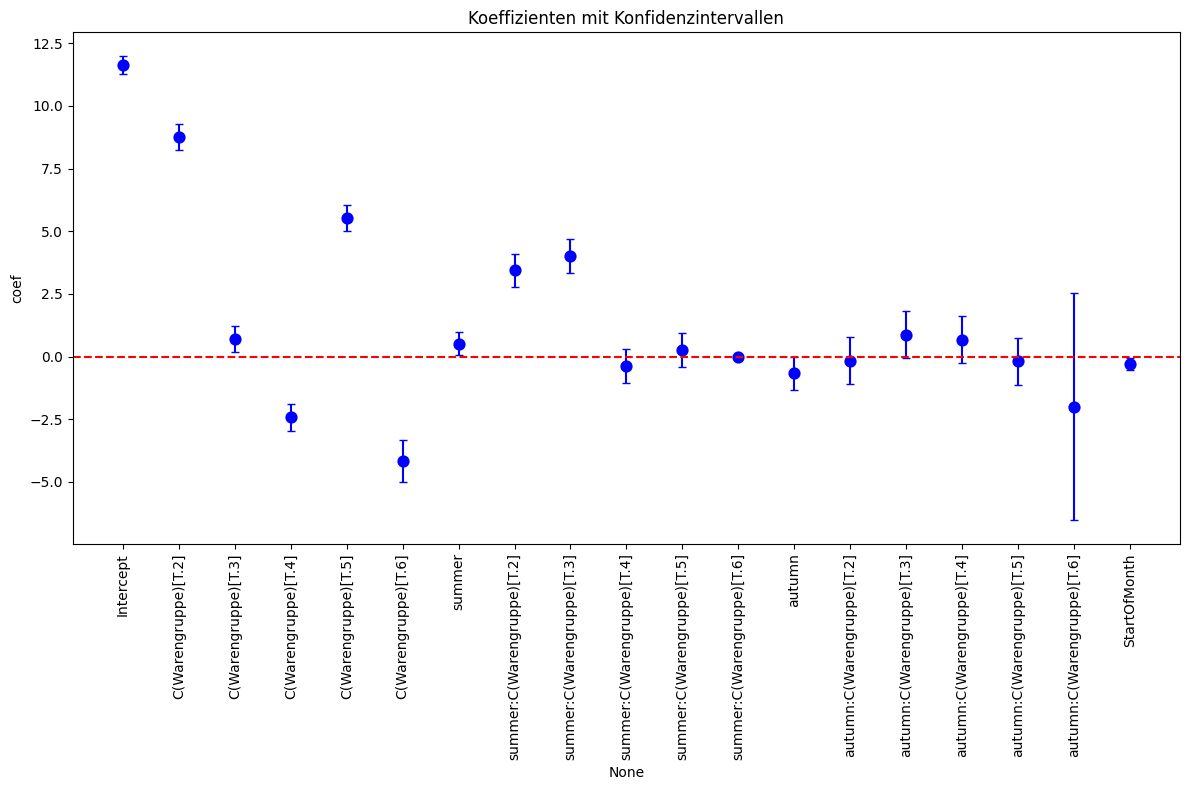

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Koeffizienten und ihre Konfidenzintervalle extrahieren
coef = mod.params
conf_int = mod.conf_int()

# Dataframe erstellen
coef_df = pd.DataFrame({'coef': coef, 'lower': conf_int[0], 'upper': conf_int[1]})

# Plot erstellen
plt.figure(figsize=(12, 8))
sns.pointplot(x=coef_df.index, y='coef', data=coef_df, join=False, color='blue')
plt.errorbar(x=range(len(coef_df)), y=coef_df['coef'],
             yerr=[coef_df['coef'] - coef_df['lower'], coef_df['upper'] - coef_df['coef']],
             fmt='none', color='blue', capsize=3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.title('Koeffizienten mit Konfidenzintervallen')
plt.tight_layout()
plt.show()